#  importing dependencies

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Data Collection and Analysis

In [22]:
#encoding='latin-1' which is used for 8-bit character encoding standard that supports Western European languages

data=pd.read_csv("amazon_dataset.csv",encoding='latin-1')
data.head(10)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
5,5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,...,INR,824.00,GHAZIABAD,UTTAR PRADESH,201102.0,IN,False,NaN,NaN,NaN
6,6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,...,INR,653.00,CHANDIGARH,CHANDIGARH,160036.0,IN,False,NaN,NaN,NaN
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,...,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,False,Easy Ship,NaN,NaN
8,8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,...,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,False,NaN,NaN,NaN
9,9,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,...,INR,363.00,Chennai,TAMIL NADU,600041.0,IN,False,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [5]:
data.describe()

,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


In [20]:
data.shape

(128808, 21)

In [14]:
data.dtypes

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Category               object
Size                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
B2B                      bool
fulfilled-by           object
New                   float64
PendingS              float64
dtype: object

In [7]:
data.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

In [9]:
data[data.duplicated()]

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
201,6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,...,INR,653.0,CHANDIGARH,CHANDIGARH,160036.0,IN,False,NaN,NaN,NaN
202,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,...,INR,399.0,HYDERABAD,TELANGANA,500032.0,IN,False,Easy Ship,NaN,NaN
203,8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,...,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,False,NaN,NaN,NaN
204,9,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,...,INR,363.0,Chennai,TAMIL NADU,600041.0,IN,False,NaN,NaN,NaN
205,10,407-5633625-6970741,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,S,Shipped,...,INR,685.0,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6640,6278,171-5170733-7855514,04-26-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,XS,Shipped,...,INR,582.0,HYDERABAD,TELANGANA,500083.0,IN,False,Easy Ship,NaN,NaN
6641,6279,403-8137343-5206760,04-26-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,XS,Shipped,...,INR,801.0,KALPETTA,KERALA,673122.0,IN,False,Easy Ship,NaN,NaN
6642,6280,408-1575454-3263526,04-26-22,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,Blazzer,M,Shipped,...,INR,690.0,CHENNAI,TAMIL NADU,600049.0,IN,False,Easy Ship,NaN,NaN
6643,6281,171-2918708-7197155,04-26-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Blazzer,XXL,Shipped,...,INR,658.0,PUNE,MAHARASHTRA,412207.0,IN,False,Easy Ship,NaN,NaN


In [10]:
data.drop_duplicates()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN


In [11]:
data.drop_duplicates(inplace=True)

In [13]:
data.shape

(128808, 21)

In [14]:
data.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7789
Amount                  7789
ship-city                 33
ship-state                33
ship-postal-code          33
ship-country              33
B2B                        0
fulfilled-by           89595
New                   128808
PendingS              128808
dtype: int64

<Axes: >

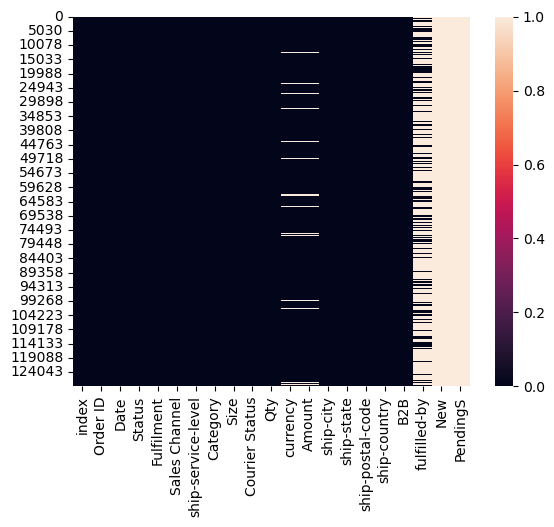

In [16]:
sns.heatmap(data.isnull())


# BUSINESS INSIGHTS


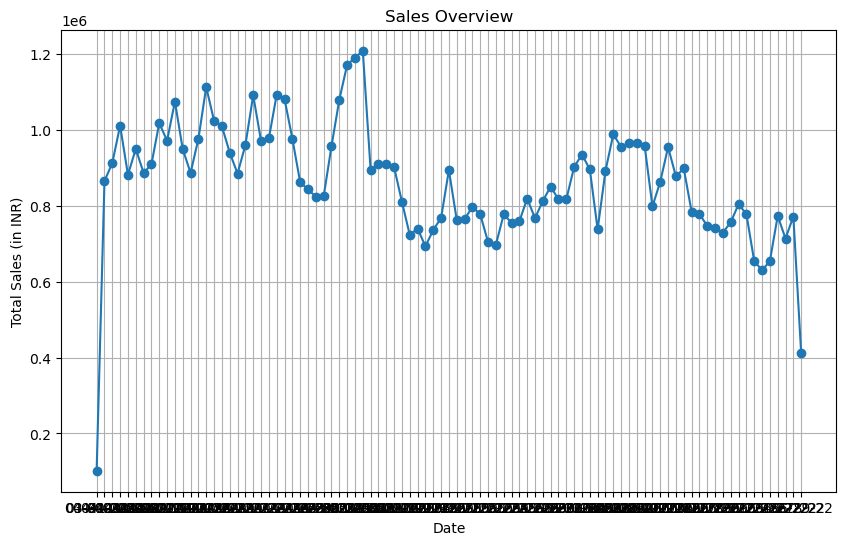

In [17]:
sales_overview = data.groupby('Date')['Amount'].sum()
plt.figure(figsize=(10, 6))
plt.plot(sales_overview, marker='o')
plt.title('Sales Overview')
plt.xlabel('Date')
plt.ylabel('Total Sales (in INR)')
plt.grid(True)
plt.show()

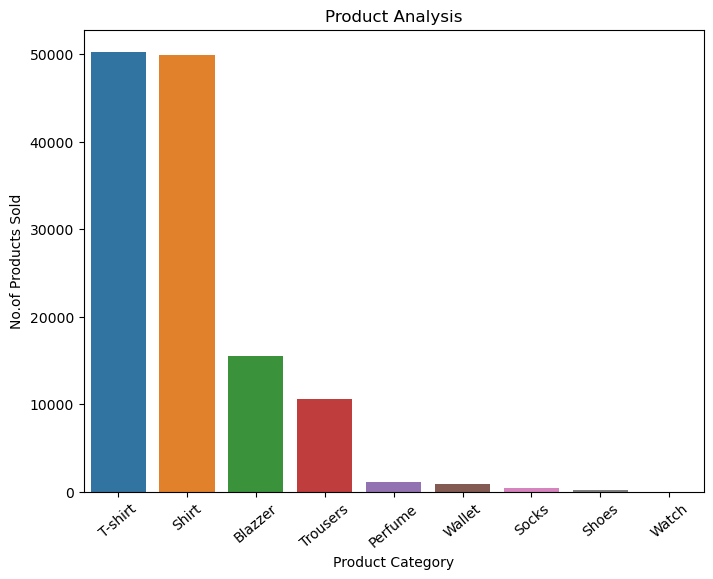

In [27]:
product_category_distribution = data['Category'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=product_category_distribution.index, y=product_category_distribution.values)
plt.title('Product Analysis')
plt.xlabel('Product Category')
plt.ylabel('No.of Products Sold')
plt.xticks(rotation=40)
plt.show()

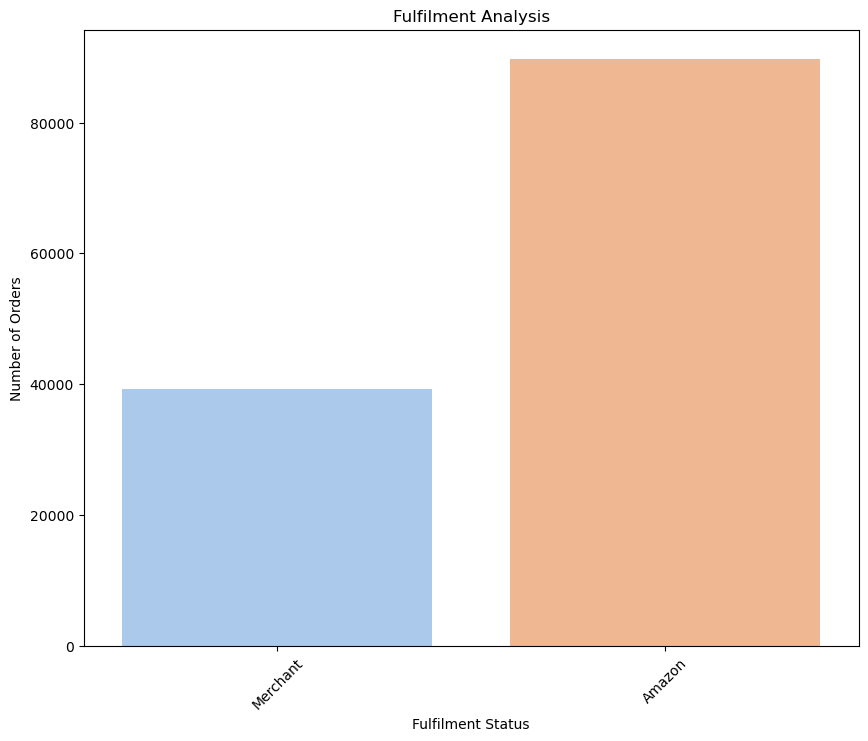

In [30]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Fulfilment', data=data, palette='pastel')
plt.title('Fulfilment Analysis')
plt.xlabel('Fulfilment Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


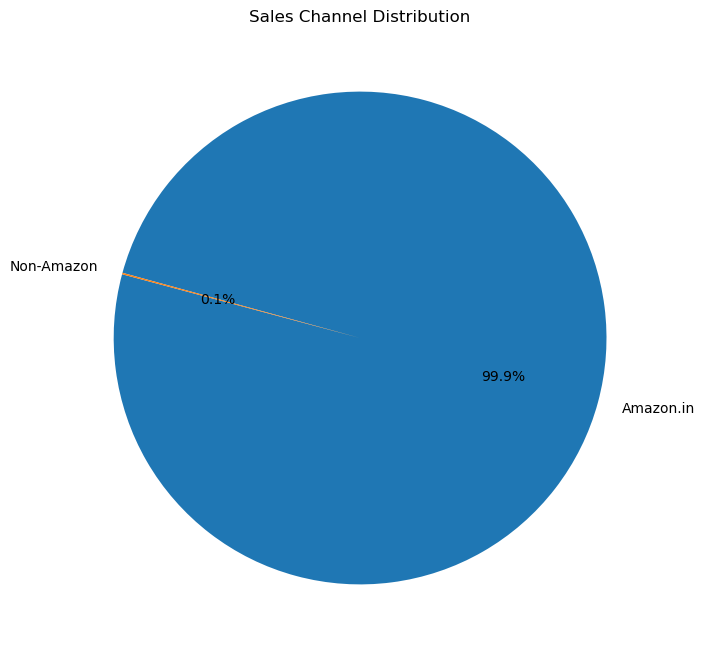

In [5]:
sales_channel_distribution = data['Sales Channel'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sales_channel_distribution, labels=sales_channel_distribution.index, autopct='%1.1f%%', startangle=165)

plt.title('Sales Channel Distribution')
plt.show()


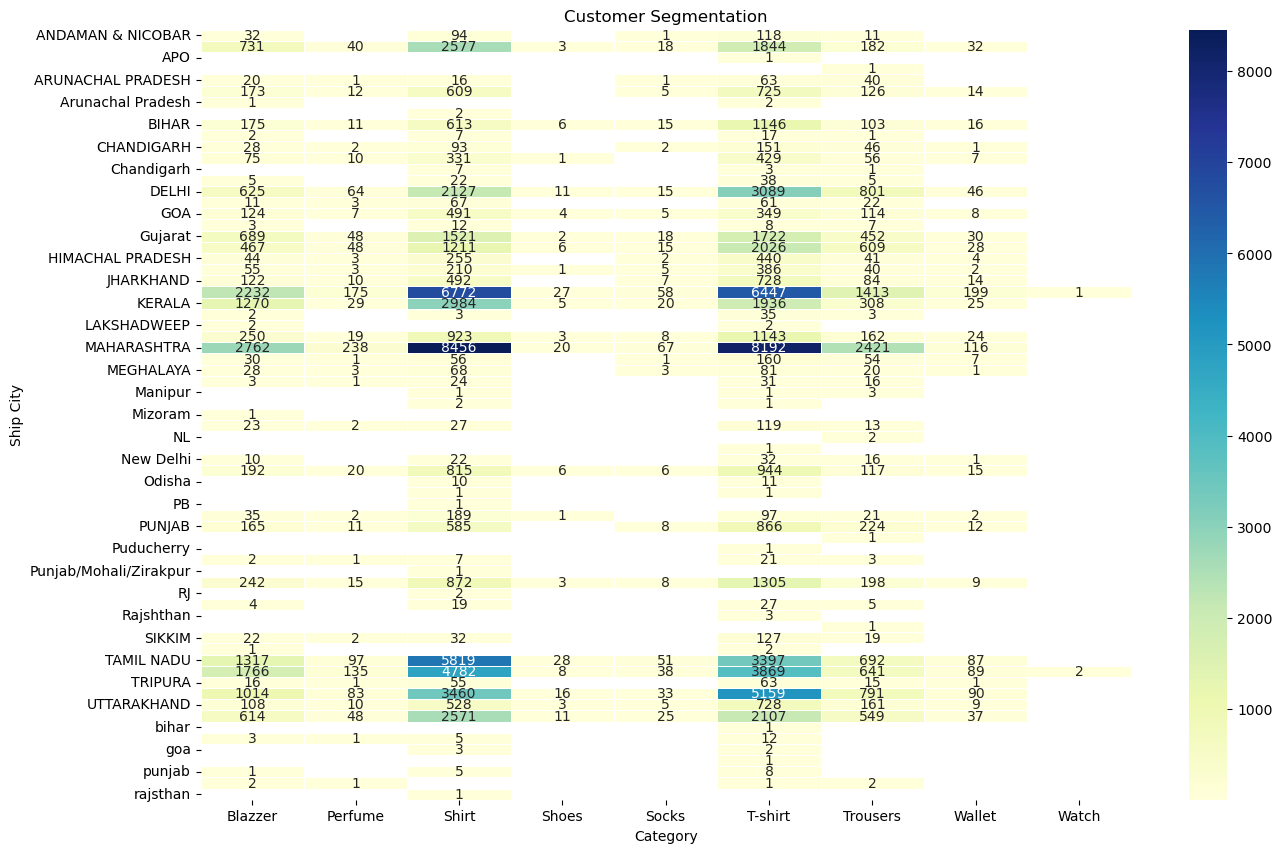

In [31]:
segmentation = data.groupby(['ship-state', 'Category']).size().unstack()

plt.figure(figsize=(15, 10))
sns.heatmap(segmentation, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)

plt.title('Customer Segmentation')
plt.xlabel('Category')
plt.ylabel('Ship City')

plt.show()

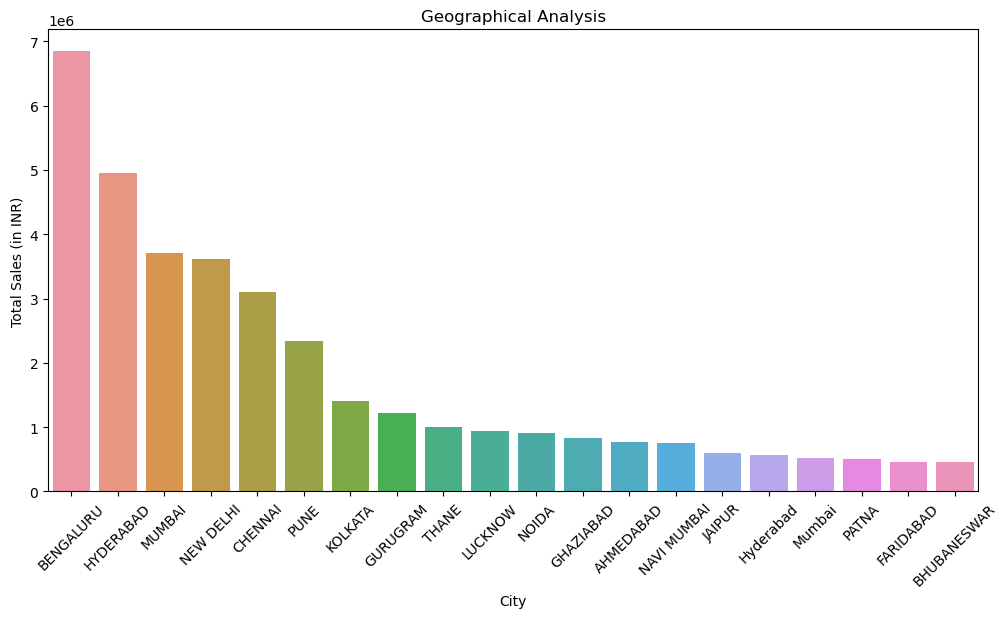

In [34]:
sales_by_city = data.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_city.index, y=sales_by_city.values)
plt.title('Geographical Analysis')
plt.xlabel('City')
plt.ylabel('Total Sales (in INR)')
plt.xticks(rotation=45)
plt.show()

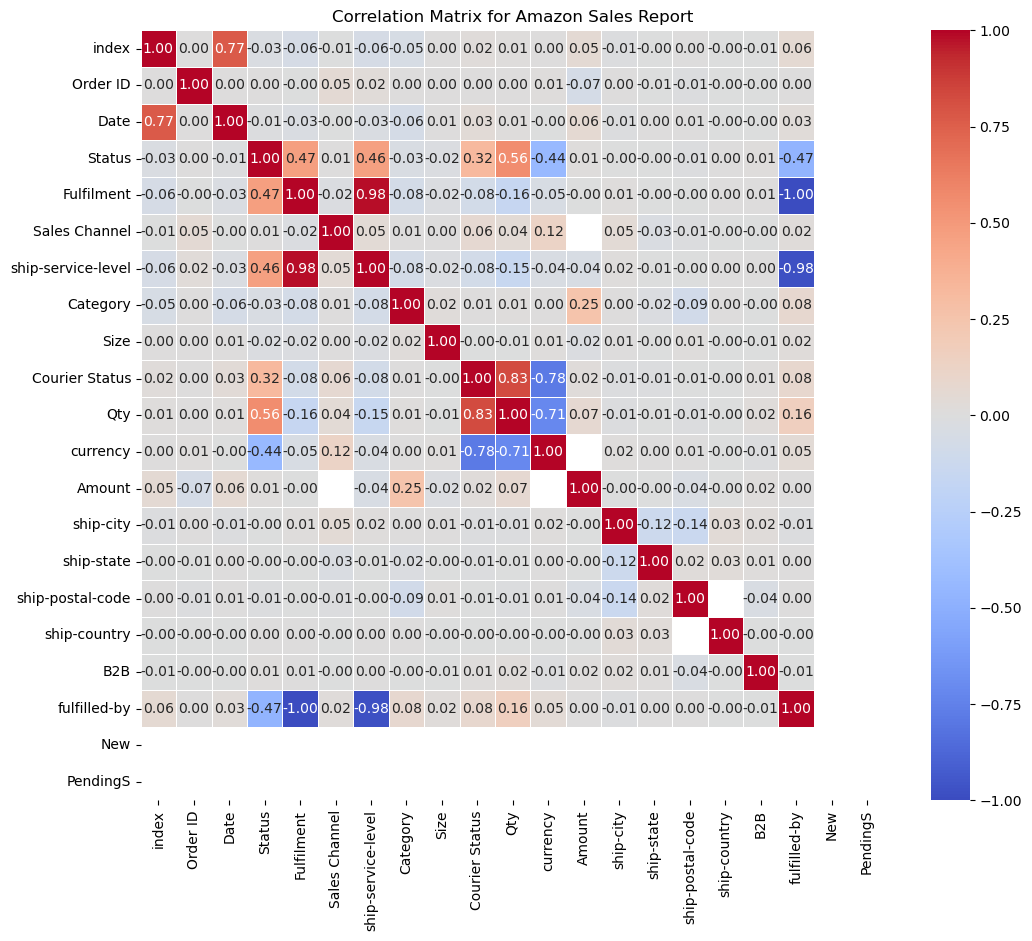

In [8]:
label_encoder = LabelEncoder()

for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])


correlation_matrix = data.corr().astype('float32')

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix for Amazon Sales Report')
plt.show()
